In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import klib
%matplotlib inline

In [2]:
path_creatinine = 'dataScienceTask/T_creatinine.csv'
path_DBP = 'dataScienceTask/T_DBP.csv'
path_glucose = 'dataScienceTask/T_glucose.csv'
path_HGB = 'dataScienceTask/T_HGB.csv'
path_Idl = 'dataScienceTask/T_ldl.csv'
path_SBP = 'dataScienceTask/T_SBP.csv'

In [3]:
df_creatinine = pd.read_csv(path_creatinine)
df_DBP = pd.read_csv(path_DBP)
df_glucose = pd.read_csv(path_glucose)
df_HGB = pd.read_csv(path_HGB)
df_Idl = pd.read_csv(path_Idl)
df_SBP = pd.read_csv(path_SBP)

print(f"Shape of df_creatinine : {df_creatinine.shape}")
print(f"Shape of df_DBP : {df_DBP.shape}")
print(f"Shape of df_glucose : {df_glucose.shape}")
print(f"Shape of df_HGB : {df_HGB.shape}")
print(f"Shape of df_Idl : {df_Idl.shape}")
print(f"Shape of df_SBP : {df_SBP.shape}")

Shape of df_creatinine : (1439, 3)
Shape of df_DBP : (1821, 3)
Shape of df_glucose : (1556, 3)
Shape of df_HGB : (2025, 3)
Shape of df_Idl : (1261, 3)
Shape of df_SBP : (1809, 3)


In [4]:
# max and min of alll values
print(f"Max of df_creatinine values : {df_creatinine.value.max()} || Max days: {df_creatinine.time.max()}")
print(f"Max of df_DBP values : {df_DBP.value.max()} || Max days: {df_DBP.time.max()}")
print(f"Max of df_glucose values : {df_glucose.value.max()} || Max days: {df_glucose.time.max()}")
print(f"Max of df_HGB values : {df_HGB.value.max()} || Max days: {df_HGB.time.max()}")
print(f"Max of df_Idl values : {df_Idl.value.max()} || Max days: {df_Idl.time.max()}")
print(f"Max of df_SBP values : {df_SBP.value.max()} || Max days: {df_SBP.time.max()}")

Max of df_creatinine values : 3.02 || Max days: 699
Max of df_DBP values : 112.93 || Max days: 699
Max of df_glucose values : 16.61 || Max days: 699
Max of df_HGB values : 19.0 || Max days: 1429
Max of df_Idl values : 198.59 || Max days: 699
Max of df_SBP values : 211.09 || Max days: 699


In [5]:
# rename the columns
df_creatinine.rename(columns = {'value':'value_creatinine', 'time':'time_creatinine'}, inplace = True)
df_DBP.rename(columns = {'value':'value_DBP', 'time':'time_DBP'}, inplace = True)
df_glucose.rename(columns = {'value':'value_glucose', 'time':'time_glucose'}, inplace = True)
df_HGB.rename(columns = {'value':'value_HGB', 'time':'time_HGB'}, inplace = True)
df_Idl.rename(columns = {'value':'value_Idl', 'time':'time_Idl'}, inplace = True)
df_SBP.rename(columns = {'value':'value_SBP', 'time':'time_SBP'}, inplace = True)

In [6]:
# remove rows for df_HBG if time > 699 days to standardize with other indicators
df_HGB_red = df_HGB[ df_HGB['time_HGB'] < 700 ].copy()
print(f"Shape of df_HGB_red : {df_HGB_red.shape}")
print(f"Max of df_HGB_red values : {df_HGB_red.value_HGB.max()} || Max days: {df_HGB_red.time_HGB.max()}")
#df_HGB_red.rename(columns = {'value':'value_HGB', 'time':'time_HGB'}, inplace = True)

Shape of df_HGB_red : (1129, 3)
Max of df_HGB_red values : 18.09 || Max days: 699


In [7]:
# Condense the values into a list for each patient id
df_agg_creatinine = df_creatinine.groupby(['id'], as_index=False)[['value_creatinine','time_creatinine']].agg(list)
df_agg_DBP = df_DBP.groupby(['id'], as_index=False)[['value_DBP','time_DBP']].agg(list)
df_agg_glucose = df_glucose.groupby(['id'], as_index=False)[['value_glucose','time_glucose']].agg(list)
df_agg_HGB_red = df_HGB_red.groupby(['id'], as_index=False)[['value_HGB','time_HGB']].agg(list)
df_agg_Idl = df_Idl.groupby(['id'], as_index=False)[['value_Idl','time_Idl']].agg(list)
df_agg_SBP = df_SBP.groupby(['id'], as_index=False)[['value_SBP','time_SBP']].agg(list)

# Add a column of lenth of list
df_agg_creatinine['len_creatinine'] = df_agg_creatinine['value_creatinine'].apply(lambda x: len(x))
df_agg_DBP['len_DBP'] = df_agg_DBP['value_DBP'].apply(lambda x: len(x))
df_agg_glucose['len_glucose'] = df_agg_glucose['value_glucose'].apply(lambda x: len(x))
df_agg_HGB_red['len_HGB'] = df_agg_HGB_red['value_HGB'].apply(lambda x: len(x))
df_agg_Idl['len_Idl'] = df_agg_Idl['value_Idl'].apply(lambda x: len(x))
df_agg_SBP['len_SBP'] = df_agg_SBP['value_SBP'].apply(lambda x: len(x))

df_agg_creatinine.head()

,id,value_creatinine,time_creatinine,len_creatinine
0,0,"[1.29, 1.15, 1.44, 1.23, 1.08, 1.23]","[0, 107, 286, 382, 580, 688]",6
1,1,"[1.74, 1.83, 1.81, 1.61, 2.2]","[0, 68, 289, 387, 470]",5
2,2,"[2.51, 1.89, 2.25, 2.0, 2.2]","[0, 184, 430, 502, 621]",5
3,3,"[0.74, 1.35, 1.1, 0.89, 0.9]","[0, 185, 370, 563, 682]",5
4,4,"[1.34, 1.09, 1.14, 1.35, 1.05, 0.93]","[0, 133, 312, 439, 574, 662]",6


In [8]:
df_agg_DBP.head()

,id,value_DBP,time_DBP,len_DBP
0,0,"[95.32, 83.98, 65.97, 83.41, 86.39, 87.64, 78....","[0, 98, 279, 380, 475, 580, 678, 679]",8
1,1,"[72.49, 82.38, 81.35, 74.31, 76.52, 85.15, 90.99]","[0, 41, 251, 350, 433, 683, 696]",7
2,2,"[81.13, 92.36, 91.86, 91.52]","[0, 187, 432, 623]",4
3,3,"[80.09, 73.33, 81.74, 66.44, 73.7, 81.25, 67.45]","[0, 183, 371, 488, 559, 674, 688]",7
4,4,"[82.23, 89.94, 89.99, 95.96, 111.44, 107.57, 1...","[0, 126, 304, 362, 431, 574, 648]",7


In [9]:
# shape after aggregation
print(f"Shape of df_creatinine : {df_agg_creatinine.shape}")
print(f"Shape of df_DBP : {df_agg_DBP.shape}")
print(f"Shape of df_glucose : {df_agg_glucose.shape}")
print(f"Shape of df_HGB : {df_agg_HGB_red.shape}")
print(f"Shape of df_Idl : {df_agg_Idl.shape}")
print(f"Shape of df_SBP : {df_agg_SBP.shape}")

Shape of df_creatinine : (300, 4)
Shape of df_DBP : (300, 4)
Shape of df_glucose : (300, 4)
Shape of df_HGB : (300, 4)
Shape of df_Idl : (300, 4)
Shape of df_SBP : (300, 4)


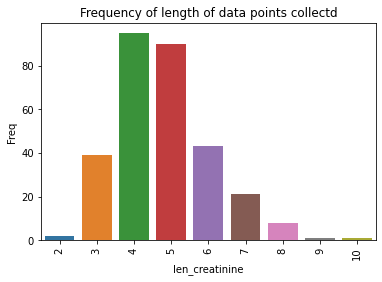

In [10]:
# Max frequent length
ax = sns.countplot(x="len_creatinine", data=df_agg_creatinine)
ax.set_title("Frequency of length of data points collectd")
ax.set_ylabel("Freq")
ax.tick_params(axis='x', rotation=90)

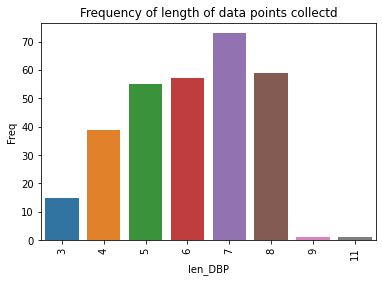

In [11]:
# Max frequent length
ax = sns.countplot(x="len_DBP", data=df_agg_DBP)
ax.set_title("Frequency of length of data points collectd")
ax.set_ylabel("Freq")
ax.tick_params(axis='x', rotation=90)

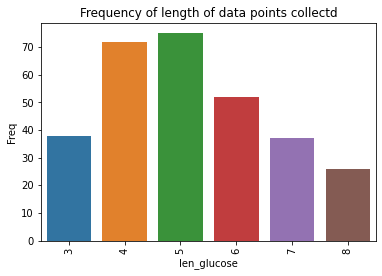

In [12]:
 # Max frequent length
ax = sns.countplot(x="len_glucose", data=df_agg_glucose)
ax.set_title("Frequency of length of data points collectd")
ax.set_ylabel("Freq")
ax.tick_params(axis='x', rotation=90)

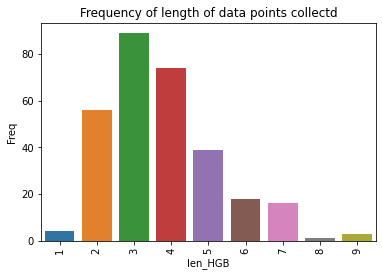

In [13]:
 # Max frequent length
ax = sns.countplot(x="len_HGB", data=df_agg_HGB_red)
ax.set_title("Frequency of length of data points collectd")
ax.set_ylabel("Freq")
ax.tick_params(axis='x', rotation=90)

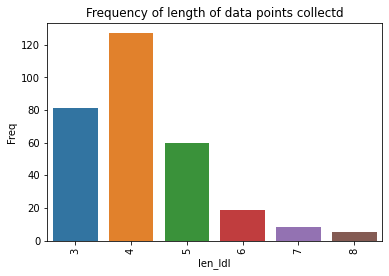

In [14]:
 # Max frequent length
ax = sns.countplot(x="len_Idl", data=df_agg_Idl)
ax.set_title("Frequency of length of data points collectd")
ax.set_ylabel("Freq")
ax.tick_params(axis='x', rotation=90)

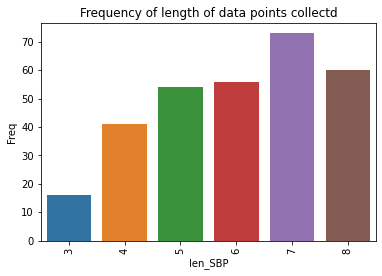

In [15]:
 # Max frequent length
ax = sns.countplot(x="len_SBP", data=df_agg_SBP)
ax.set_title("Frequency of length of data points collectd")
ax.set_ylabel("Freq")
ax.tick_params(axis='x', rotation=90)

In [16]:
# read csv
df_stage = pd.read_csv('dataScienceTask/T_stage.csv')
df_stage.head()

,id,Stage_Progress
0,0,True
1,1,False
2,2,True
3,3,False
4,4,True


In [17]:
df_cat = pd.concat([df_agg_creatinine[['id','value_creatinine','time_creatinine','len_creatinine']], df_agg_DBP[['value_DBP','time_DBP','len_DBP']]], axis=1)
df_cat = pd.concat([df_cat, df_agg_glucose[['value_glucose','time_glucose','len_glucose']]], axis=1)
df_cat = pd.concat([df_cat, df_agg_HGB_red[['value_HGB','time_HGB','len_HGB']]], axis=1)
df_cat = pd.concat([df_cat, df_agg_Idl[['value_Idl','time_Idl','len_Idl']]], axis=1)
df_cat = pd.concat([df_cat, df_agg_SBP[['value_SBP','time_SBP','len_SBP']]], axis=1)

In [18]:
print(df_cat.shape)

(300, 19)


In [19]:
df_cat = pd.merge(df_cat, df_stage, on="id", how="left").copy()
df_cat.head()

,id,value_creatinine,time_creatinine,len_creatinine,value_DBP,time_DBP,len_DBP,value_glucose,time_glucose,len_glucose,value_HGB,time_HGB,len_HGB,value_Idl,time_Idl,len_Idl,value_SBP,time_SBP,len_SBP,Stage_Progress
0,0,"[1.29, 1.15, 1.44, 1.23, 1.08, 1.23]","[0, 107, 286, 382, 580, 688]",6,"[95.32, 83.98, 65.97, 83.41, 86.39, 87.64, 78....","[0, 98, 279, 380, 475, 580, 678, 679]",8,"[6.24, 7.2, 7.01, 6.89, 5.62, 5.78]","[0, 107, 286, 382, 580, 688]",6,"[13.51, 13.39, 12.84, 13.32, 13.53]","[0, 107, 286, 382, 688]",5,"[161.49, 111.39, 157.9]","[0, 107, 382]",3,"[134.11, 133.75, 125.08, 136.75, 130.5, 154.91...","[0, 98, 279, 380, 475, 580, 678, 679]",8,True
1,1,"[1.74, 1.83, 1.81, 1.61, 2.2]","[0, 68, 289, 387, 470]",5,"[72.49, 82.38, 81.35, 74.31, 76.52, 85.15, 90.99]","[0, 41, 251, 350, 433, 683, 696]",7,"[9.96, 8.27, 8.43, 9.76, 9.78]","[0, 221, 319, 402, 660]",5,"[13.89, 14.4, 14.81]","[0, 387, 470]",3,"[89.57, 98.73, 71.56, 79.02, 73.24]","[0, 221, 319, 402, 660]",5,"[157.46, 153.59, 137.75, 152.73, 144.68, 155.7...","[0, 41, 251, 350, 433, 683, 696]",7,False
2,2,"[2.51, 1.89, 2.25, 2.0, 2.2]","[0, 184, 430, 502, 621]",5,"[81.13, 92.36, 91.86, 91.52]","[0, 187, 432, 623]",4,"[7.24, 5.12, 7.04]","[0, 183, 621]",3,"[15.34, 15.65, 15.98, 16.84, 16.7]","[0, 184, 430, 497, 502]",5,"[61.62, 77.09, 87.14]","[0, 184, 497]",3,"[132.89, 143.73, 147.76, 136.46]","[0, 187, 432, 623]",4,True
3,3,"[0.74, 1.35, 1.1, 0.89, 0.9]","[0, 185, 370, 563, 682]",5,"[80.09, 73.33, 81.74, 66.44, 73.7, 81.25, 67.45]","[0, 183, 371, 488, 559, 674, 688]",7,"[6.43, 7.45, 6.66, 7.43, 5.41, 5.77]","[0, 185, 370, 563, 675, 682]",6,"[13.74, 14.0, 14.28, 12.38, 12.34]","[0, 185, 370, 563, 682]",5,"[99.71, 99.01, 110.29, 80.8, 101.42]","[0, 185, 378, 497, 610]",5,"[147.46, 142.98, 147.81, 121.21, 125.89, 148.8...","[0, 183, 371, 488, 559, 674, 688]",7,False
4,4,"[1.34, 1.09, 1.14, 1.35, 1.05, 0.93]","[0, 133, 312, 439, 574, 662]",6,"[82.23, 89.94, 89.99, 95.96, 111.44, 107.57, 1...","[0, 126, 304, 362, 431, 574, 648]",7,"[8.76, 10.31, 10.45, 9.11, 8.58, 9.83, 11.0]","[0, 127, 133, 310, 312, 439, 653]",7,"[13.21, 12.87]","[0, 306]",2,"[65.73, 71.26, 54.61, 72.03]","[0, 130, 312, 574]",4,"[128.78, 161.95, 160.01, 160.27, 173.46, 173.7...","[0, 126, 304, 362, 431, 574, 648]",7,True


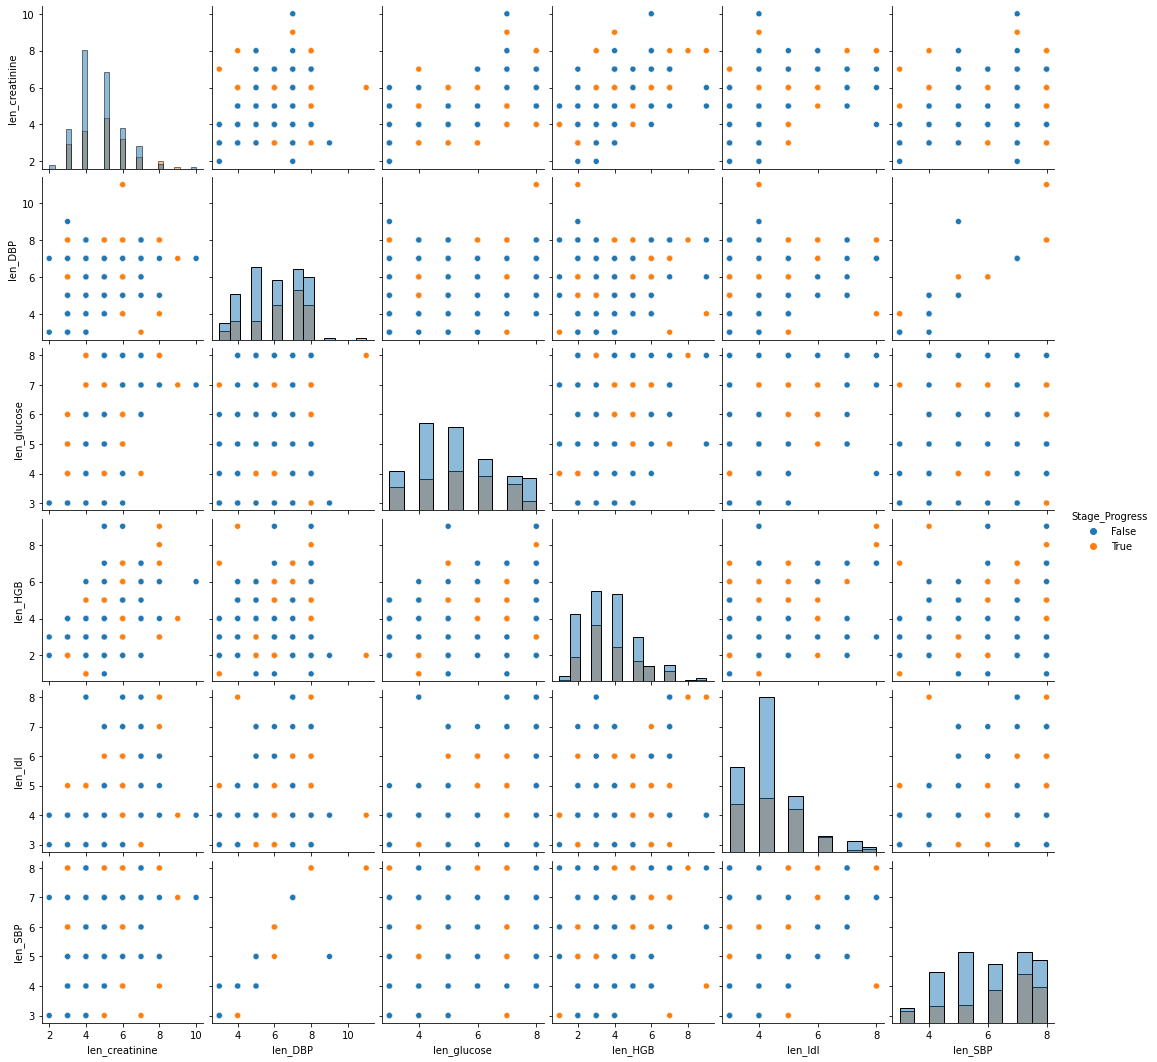

In [22]:
# Attempting to see if lengths of individual indicators have any relationship with one another.
sns.pairplot(df_cat[['len_creatinine','len_DBP','len_glucose','len_HGB','len_Idl','len_SBP','Stage_Progress']], hue="Stage_Progress", diag_kind="hist")

In [20]:
from utils import generate_indicator_waves
indicator_list = ['creatinine','DBP','glucose','HGB','Idl','SBP']
out = generate_indicator_waves(df_cat, indicator_list, max_end_day = 699, max_patient_id = 299)
print(len(out))
print(len(out[0]))

1800
702


Patient: 0
Indicator: glucose


Text(0, 0.5, 'Measurement')

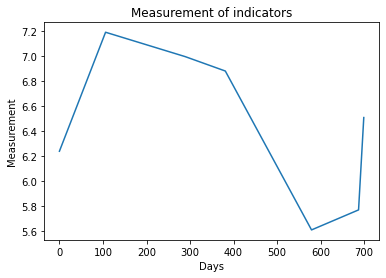

In [21]:
p=2
print(f"Patient: {out[p][0]}")
print(f"Indicator: {out[p][1]}")
plt.plot(np.arange(700), out[p][2:])
plt.title("Measurement of indicators")
plt.xlabel("Days")
plt.ylabel("Measurement")

In [23]:
import csv
header = ['id','indicator']
header.extend(indicator_list)
with open('waves_indicators.csv', "w") as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(out)
file.close()

In [25]:
data=pd.read_csv('waves_indicators.csv')
data.shape

(1800, 8)

In [2]:
#from utils import linear_interpolate
#val_list = [1.29, 1.15, 1.44, 1.23, 1.08, 1.23]
#time_list = [0, 107, 286, 382, 580, 688]

#wave = linear_interpolate(val_list,time_list, max_end_day=699)

Text(0, 0.5, 'Measurement')

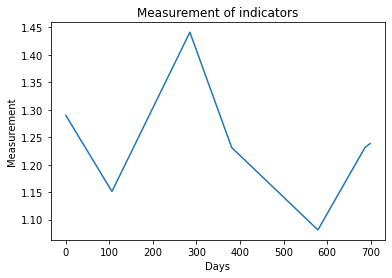

In [6]:
#plt.plot(np.arange(700), wave)
#plt.title("Measurement of indicators")
#plt.xlabel("Days")
#plt.ylabel("Measurement")

In [ ]:
x=np.arange(700)
fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(x, df_agg_creatinine['value'][0])
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, df_agg_DBP['value'][0], 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, df_agg_glucose['value'][0], 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, df_agg_HGB_red['value'][0], 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')
axs[2, 0].plot(x, df_agg_Idl['value'][0], 'tab:blue')
axs[2, 0].set_title('Axis [1, 0]')
axs[2, 1].plot(x, df_agg_SBP['value'][0], 'tab:orange')
axs[2, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

In [ ]:
df_agg_creatinine['value'][0]